In [1]:
%pylab inline
data_dir='/usr/local/share/galsim/COSMOS_25.2_training_sample'
stamp_size=64
pixel_scale=0.03
k_scale=2. * np.pi / (pixel_scale * stamp_size)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import galsim
# First step is to find an HST PSF that will work for all images,
# we are taking a random sample of 1000 psfs, take the largest one,
# and dilate it a little bit with GalSim
cat = galsim.COSMOSCatalog(dir=data_dir)
psfs = []
psfs_fwhm = []
npsfs = 5000

# Build isotropic PSf
stamp_size=128
pixel_scale=0.03
kscale=2. *  np.pi / (pixel_scale * stamp_size)

ims_r = [ ]

for i in range(npsfs):
    gal = cat.makeGalaxy(i)
    psfs.append(gal.original_psf)
    psfs_fwhm.append(gal.original_psf.calculateFWHM())
    im = gal.original_psf.drawKImage(nx=stamp_size,ny=stamp_size, scale=kscale)
    ims_r.append(abs(im.array))

/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWarning: Passing (type, 1)

In [3]:
i_psf_max = np.argmax(array(psfs_fwhm))
psf_max = psfs[i_psf_max]

i_psf_min = np.argmin(array(psfs_fwhm))
psf_min = psfs[i_psf_min]

In [4]:
# Build reference PSF
ref_psf = galsim.InterpolatedKImage(galsim.ImageCD(abs(array(ims_r)).min(axis=0) +0j, scale=kscale))

# Apply transform to make isotropic
ims_r2 = [ ]
for i in range(360):
    im = ref_psf.rotate(galsim.Angle(i*np.pi/180., galsim.radians)).drawKImage(nx=stamp_size,ny=stamp_size, scale=kscale)
    ims_r2.append(abs(im.array))

mat = abs(array(ims_r2)).min(axis=0)
mat = mat + mat.T
effective_psf = galsim.InterpolatedKImage(galsim.ImageCD(mat+0j, scale=kscale))
# Apply some dilation and normalize the PSF
effective_psf = effective_psf.dilate(1.01).withFlux(1.)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


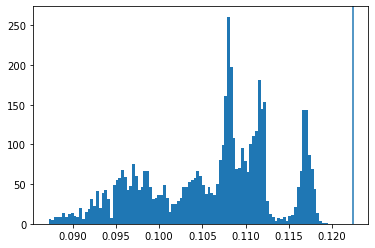

In [5]:
%pylab inline
hist(array(psfs_fwhm),100);
axvline(effective_psf.calculateFWHM())

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


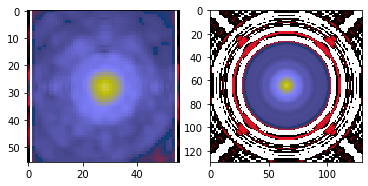

In [6]:
subplot(121)
imshow(log10(psf_max.drawImage().array),cmap='gist_stern',vmin=-7,vmax=0); 
subplot(122)
imshow(log10(effective_psf.drawImage().array),cmap='gist_stern',vmin=-7,vmax=0);

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'non isotropic avg psf')

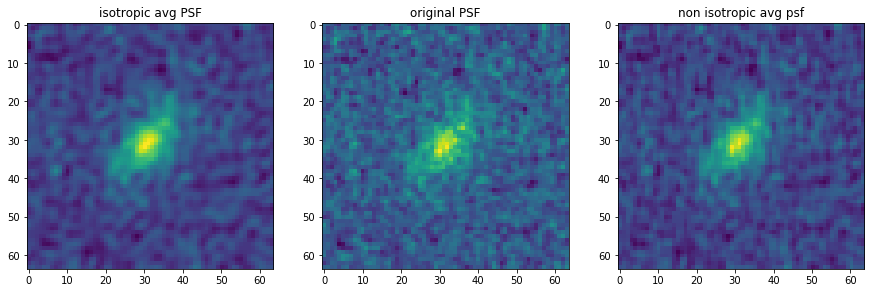

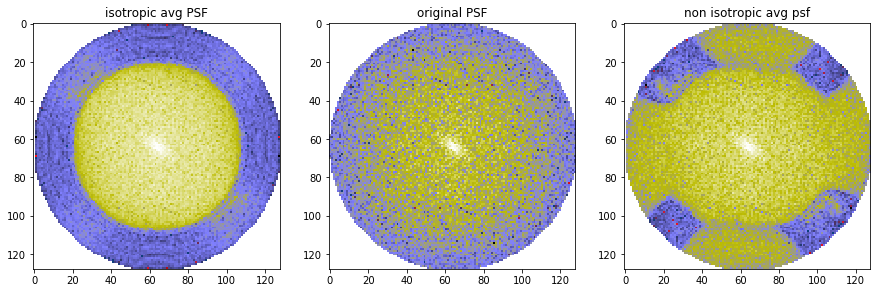

In [7]:
figure(figsize=(15,5))
im = galsim.Image(64,64, scale=0.03)
gal  = cat.makeGalaxy(12, noise_pad_size=2*64 * 0.03)
gal2 = cat.makeGalaxy(123, noise_pad_size=2*64 * 0.03)
subplot(131)
galsim.Convolve(gal, effective_psf).drawImage(im, method='no_pixel');
imshow(im.array)
title('isotropic avg PSF')
subplot(132)
galsim.Convolve(gal, gal.original_psf).drawImage(im, method='no_pixel');
imshow(im.array)
title('original PSF')
subplot(133)
galsim.Convolve(gal, ref_psf).drawImage(im, method='no_pixel');
imshow(im.array)
title('non isotropic avg psf')

figure(figsize=(15,5))
im = galsim.Image(64,64, scale=0.03)
gal  = cat.makeGalaxy(12, noise_pad_size=2*64 * 0.03)
gal2 = cat.makeGalaxy(123, noise_pad_size=2*64 * 0.03)
subplot(131)
imshow(log10(abs(galsim.Convolve(gal, effective_psf).drawKImage(nx=stamp_size,ny=stamp_size, scale=kscale).array)), cmap='gist_stern')
title('isotropic avg PSF')
subplot(132)
imshow(log10(abs(galsim.Convolve(gal, gal.original_psf).drawKImage(nx=stamp_size,ny=stamp_size, scale=kscale).array)), cmap='gist_stern')
title('original PSF')
subplot(133)
imshow(log10(abs(galsim.Convolve(gal, ref_psf).drawKImage(nx=stamp_size,ny=stamp_size, scale=kscale).array)), cmap='gist_stern')
title('non isotropic avg psf')

In [8]:
from astropy.io import fits
# Exporting the effective PSF
im = effective_psf.drawImage(nx=100,ny=100, scale=0.03)
fits.writeto('../data/hst_cosmos_effective_psf.fits', im.array, clobber=True)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


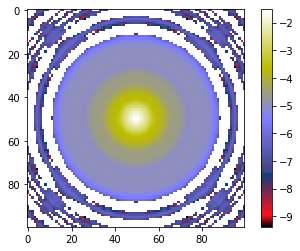

In [9]:
imshow(log10(im.array),cmap='gist_stern');colorbar()

In [10]:
effective_psf

NameError: name 'effe' is not defined